# Managing missing data

## Workflow
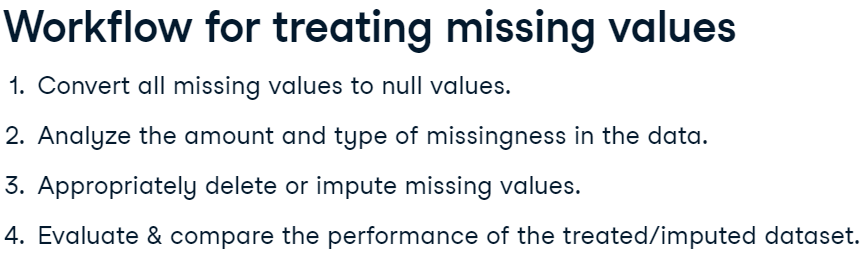

In [1]:
import os
os.getcwd()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno


In [2]:
import statsmodels.api as sm

In [3]:
df = pd.read_csv(r'c:\Users\Andres Ruiz Rada\Documents\GitHub\poc-069-lumon-riesgo-crediticio-fase1\data\stage\db_stage_infousers.csv')
df.head()


,PLAZO,CAPITAL,DÍAS MORA,Cuotas en mora,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,NUMERO DE HIJOS,...,CIUDAD RESIDENCIA,TRABAJO,TIPO DE VIVIENDA,AÑOS EN LA VIVIENDA,TIPO DE CONTRATO,PERIODO DE PAGO,ESTADO CIVIL,NIVEL EDUCATIVO,TIPO DE VEHICULO,TIEMPO TRABAJO
0,9,100000,2869,1,2.0,NaN,NaN,NaN,0.0,0.0,...,pasto,despachador de bodega,NaN,mas de 5 años,Indefinido,Mensual,NaN,NaN,Ninguno,24 meses
1,14,150000,2864,1,3.0,NaN,NaN,NaN,0.0,0.0,...,buga,supervisor,NaN,mas de 5 años,Indefinido,Mensual,NaN,NaN,Ninguno,12 meses
2,30,350000,2856,1,3.0,NaN,NaN,NaN,0.0,0.0,...,Cucuta,Psicologa,NaN,mas de 5 años,Termino fijo,Mensual,NaN,NaN,Carro,1 año
3,29,250000,2851,1,3.0,NaN,NaN,NaN,1.0,1.0,...,bogota,rentista capital,NaN,entre uno y cinco años,NaN,NaN,NaN,NaN,Ninguno,NaN
4,28,200000,2851,1,3.0,NaN,NaN,NaN,1.0,1.0,...,La Ceja,Docente primera infancia,NaN,entre uno y cinco años,Termino fijo,Mensual,NaN,NaN,Ninguno,9 horas


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   PLAZO                     4113 non-null   int64  
 1   CAPITAL                   4113 non-null   int64  
 2   DÍAS MORA                 4113 non-null   int64  
 3   Cuotas en mora            4113 non-null   int64  
 4   ESTRATO                   4105 non-null   float64
 5   INGRESOS MENSUALES        3424 non-null   float64
 6   GASTOS MENSUALES          3404 non-null   float64
 7   INGRESOS ADICIONALES      2336 non-null   float64
 8   PERSONAS A CARGO          2749 non-null   float64
 9   NUMERO DE HIJOS           2744 non-null   float64
 10  NUM.CREDITOS SOLICITADOS  4113 non-null   int64  
 11  out                       4113 non-null   int64  
 12  TIPO EMPLEO               4113 non-null   object 
 13  CIUDAD RESIDENCIA         4096 non-null   object 
 14  TRABAJO 

In [5]:
estrato_unique = df.ESTRATO.unique()
np.sort(estrato_unique)

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7., nan])

to replace hipothetical cases with ' .' or ' ' just do:
df = pd.read_csv('file', na_values = ',' etc)

In [6]:
df.describe()

,PLAZO,CAPITAL,DÍAS MORA,Cuotas en mora,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,NUMERO DE HIJOS,NUM.CREDITOS SOLICITADOS,out
count,4113.000000,4113.000000,4113.000000,4113.000000,4105.000000,3.424000e+03,3.404000e+03,2.336000e+03,2749.000000,2744.000000,4113.000000,4113.0
mean,29.248480,251163.654024,1453.649647,0.629468,2.656273,2.163832e+06,8.533980e+05,4.312411e+05,1.288105,1.344752,1.073426,0.0
std,3.001542,105786.335133,560.880919,0.483006,0.848976,3.690659e+06,2.709781e+06,5.967274e+05,0.871225,0.897573,0.385102,0.0
min,4.000000,100000.000000,446.000000,0.000000,1.000000,8.000000e+02,1.000000e+02,0.000000e+00,0.000000,0.000000,1.000000,0.0
25%,30.000000,180000.000000,1009.000000,0.000000,2.000000,1.200000e+06,4.000000e+05,1.500000e+05,1.000000,1.000000,1.000000,0.0
50%,30.000000,200000.000000,1468.000000,1.000000,3.000000,1.600000e+06,6.000000e+05,3.000000e+05,1.000000,1.000000,1.000000,0.0
75%,30.000000,300000.000000,1925.000000,1.000000,3.000000,2.383500e+06,1.000000e+06,5.000000e+05,2.000000,2.000000,1.000000,0.0
max,30.000000,500000.000000,2869.000000,1.000000,7.000000,1.250000e+08,1.500000e+08,1.500000e+07,5.000000,5.000000,11.000000,0.0


ingresos y gastos mensuales: corregir valores minimos y maximos. los datos incoherentes con la escala pueden ser tratados como missing values

In [7]:
# reemplazar valores por nan
#df.column[df.column==0] = np.nan


## Select rows with nan

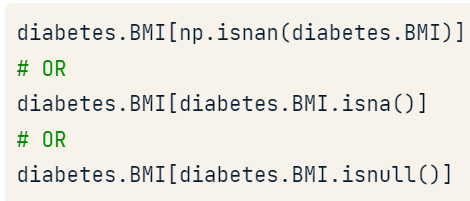

## Amount of missingness

In [8]:
df_nullity = df.isna()
df_nullity.head()

,PLAZO,CAPITAL,DÍAS MORA,Cuotas en mora,ESTRATO,INGRESOS MENSUALES,GASTOS MENSUALES,INGRESOS ADICIONALES,PERSONAS A CARGO,NUMERO DE HIJOS,...,CIUDAD RESIDENCIA,TRABAJO,TIPO DE VIVIENDA,AÑOS EN LA VIVIENDA,TIPO DE CONTRATO,PERIODO DE PAGO,ESTADO CIVIL,NIVEL EDUCATIVO,TIPO DE VEHICULO,TIEMPO TRABAJO
0,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False
1,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False
2,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False
3,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,True,True,True,True,False,True
4,False,False,False,False,False,True,True,True,False,False,...,False,False,True,False,False,False,True,True,False,False


In [9]:
df_nullity.sum()
df_nullity.mean()*100

PLAZO                        0.000000
CAPITAL                      0.000000
DÍAS MORA                    0.000000
Cuotas en mora               0.000000
ESTRATO                      0.194505
INGRESOS MENSUALES          16.751763
GASTOS MENSUALES            17.238026
INGRESOS ADICIONALES        43.204474
PERSONAS A CARGO            33.163141
NUMERO DE HIJOS             33.284707
NUM.CREDITOS SOLICITADOS     0.000000
out                          0.000000
TIPO EMPLEO                  0.000000
CIUDAD RESIDENCIA            0.413324
TRABAJO                      2.479942
TIPO DE VIVIENDA            19.183078
AÑOS EN LA VIVIENDA          0.170192
TIPO DE CONTRATO            17.019207
PERIODO DE PAGO             17.140773
ESTADO CIVIL                19.207391
NIVEL EDUCATIVO             19.280331
TIPO DE VEHICULO             0.145879
TIEMPO TRABAJO              16.508631
dtype: float64

<Axes: >

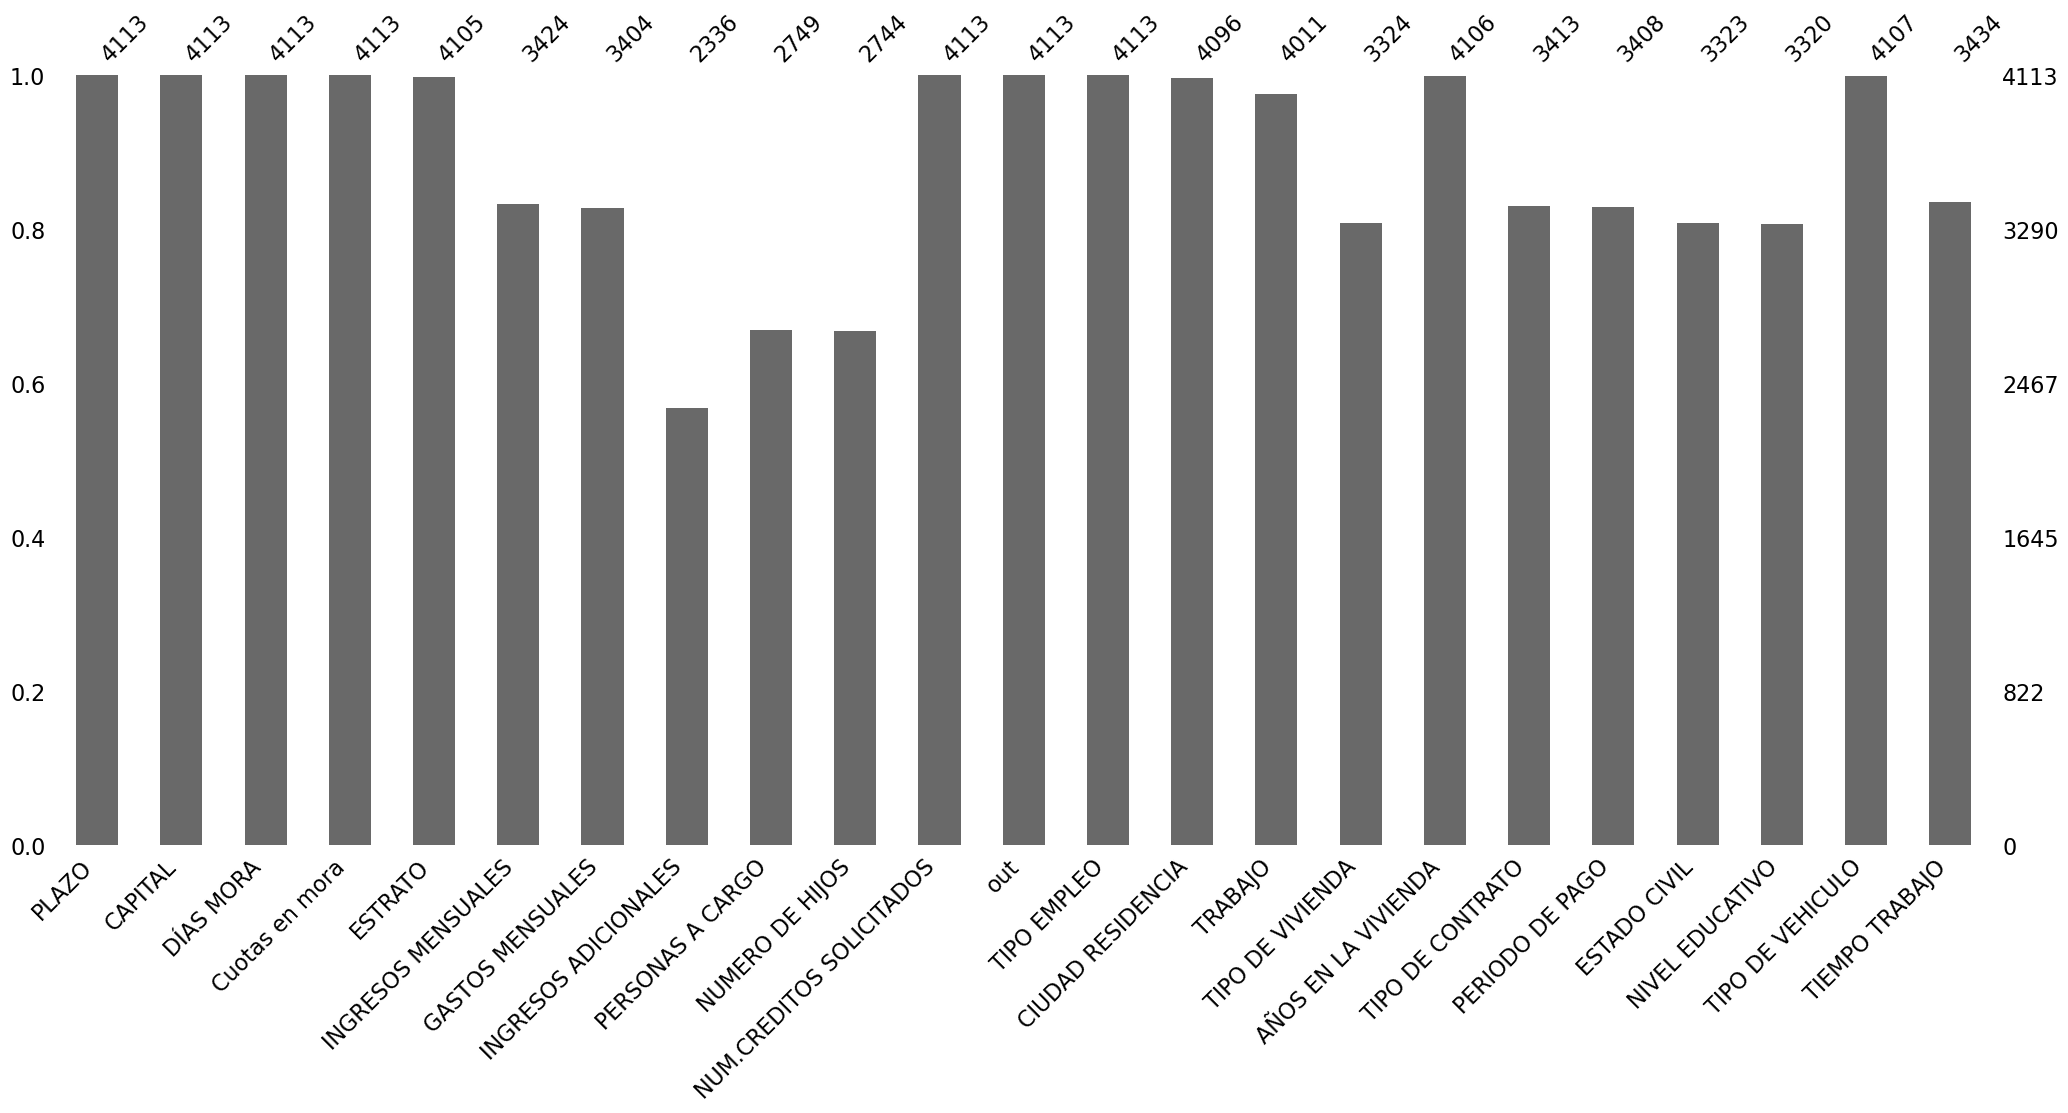

In [10]:
msno.bar(df)

<Axes: >

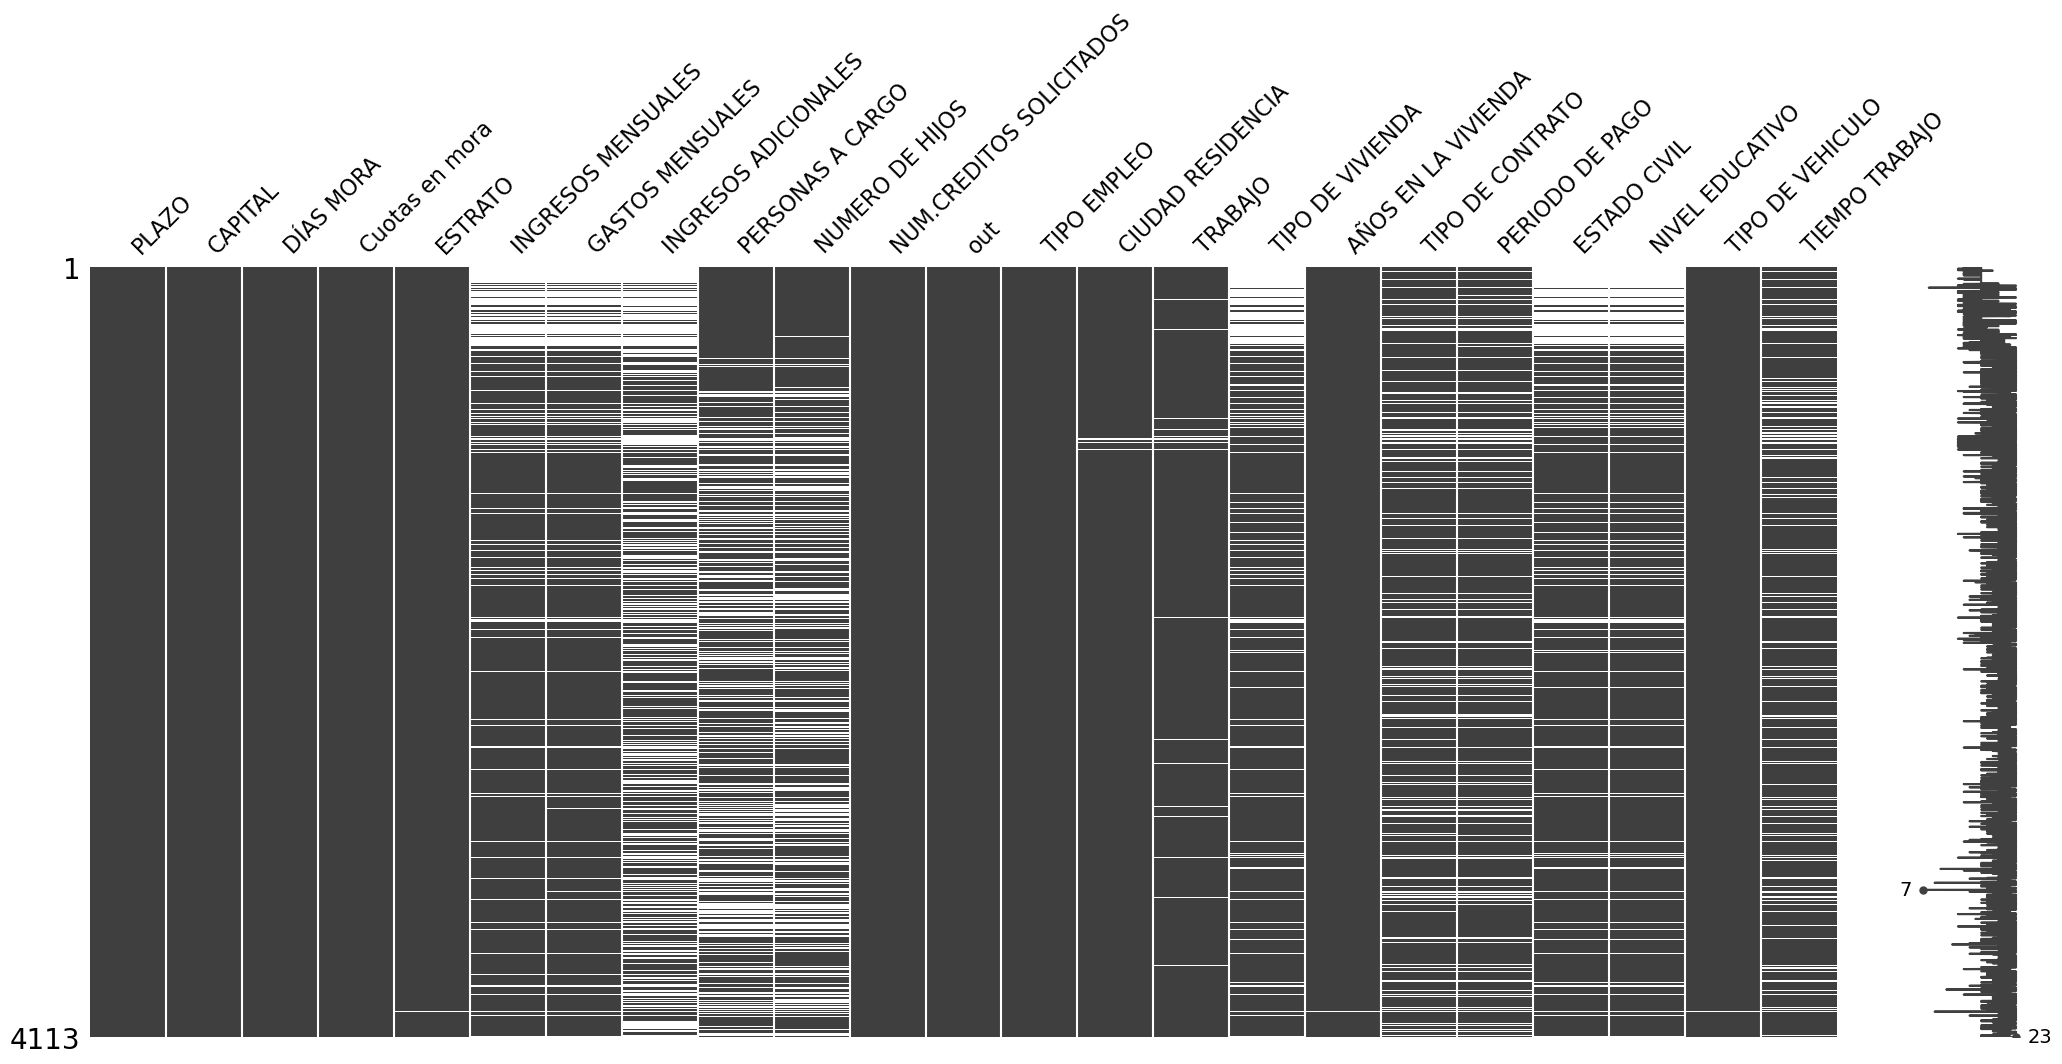

In [11]:
msno.matrix(df)

c:\Users\Andres Ruiz Rada\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


ValueError: could not convert string to float: '--'

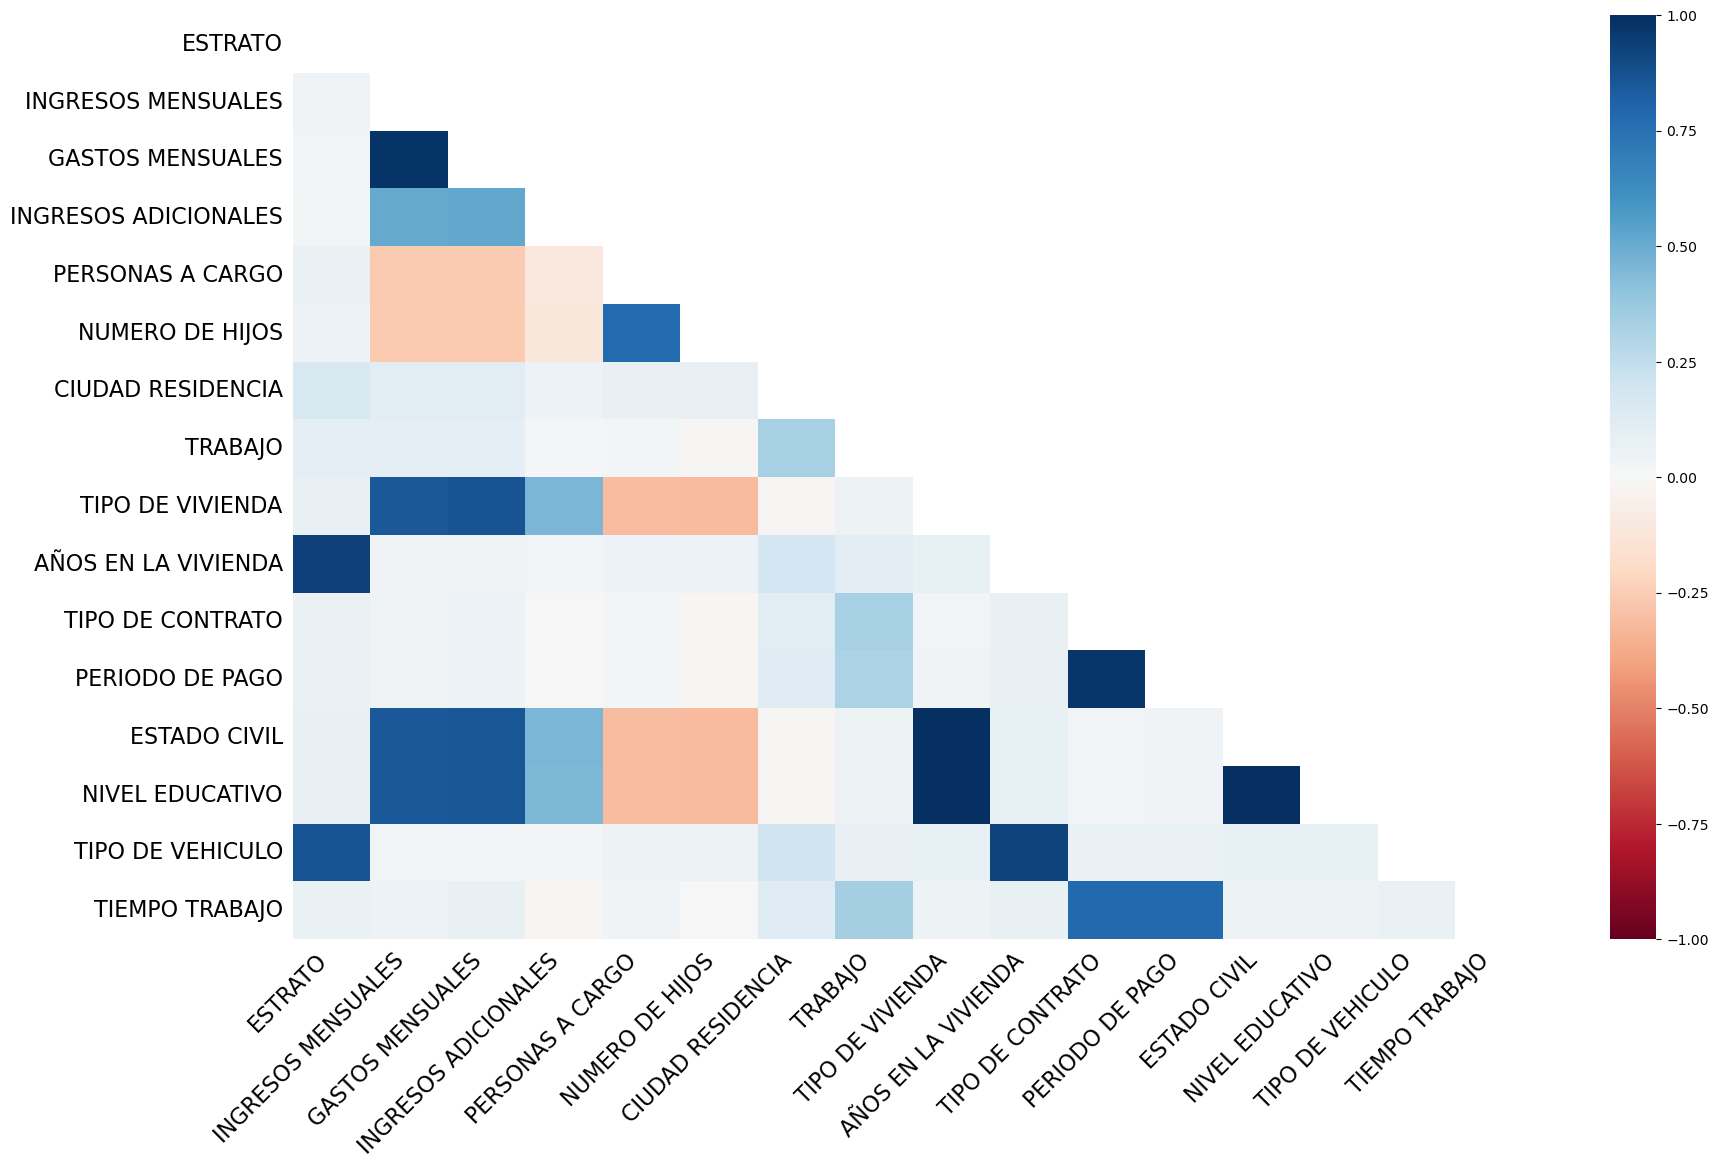

In [12]:
msno.heatmap(df)

<Axes: >

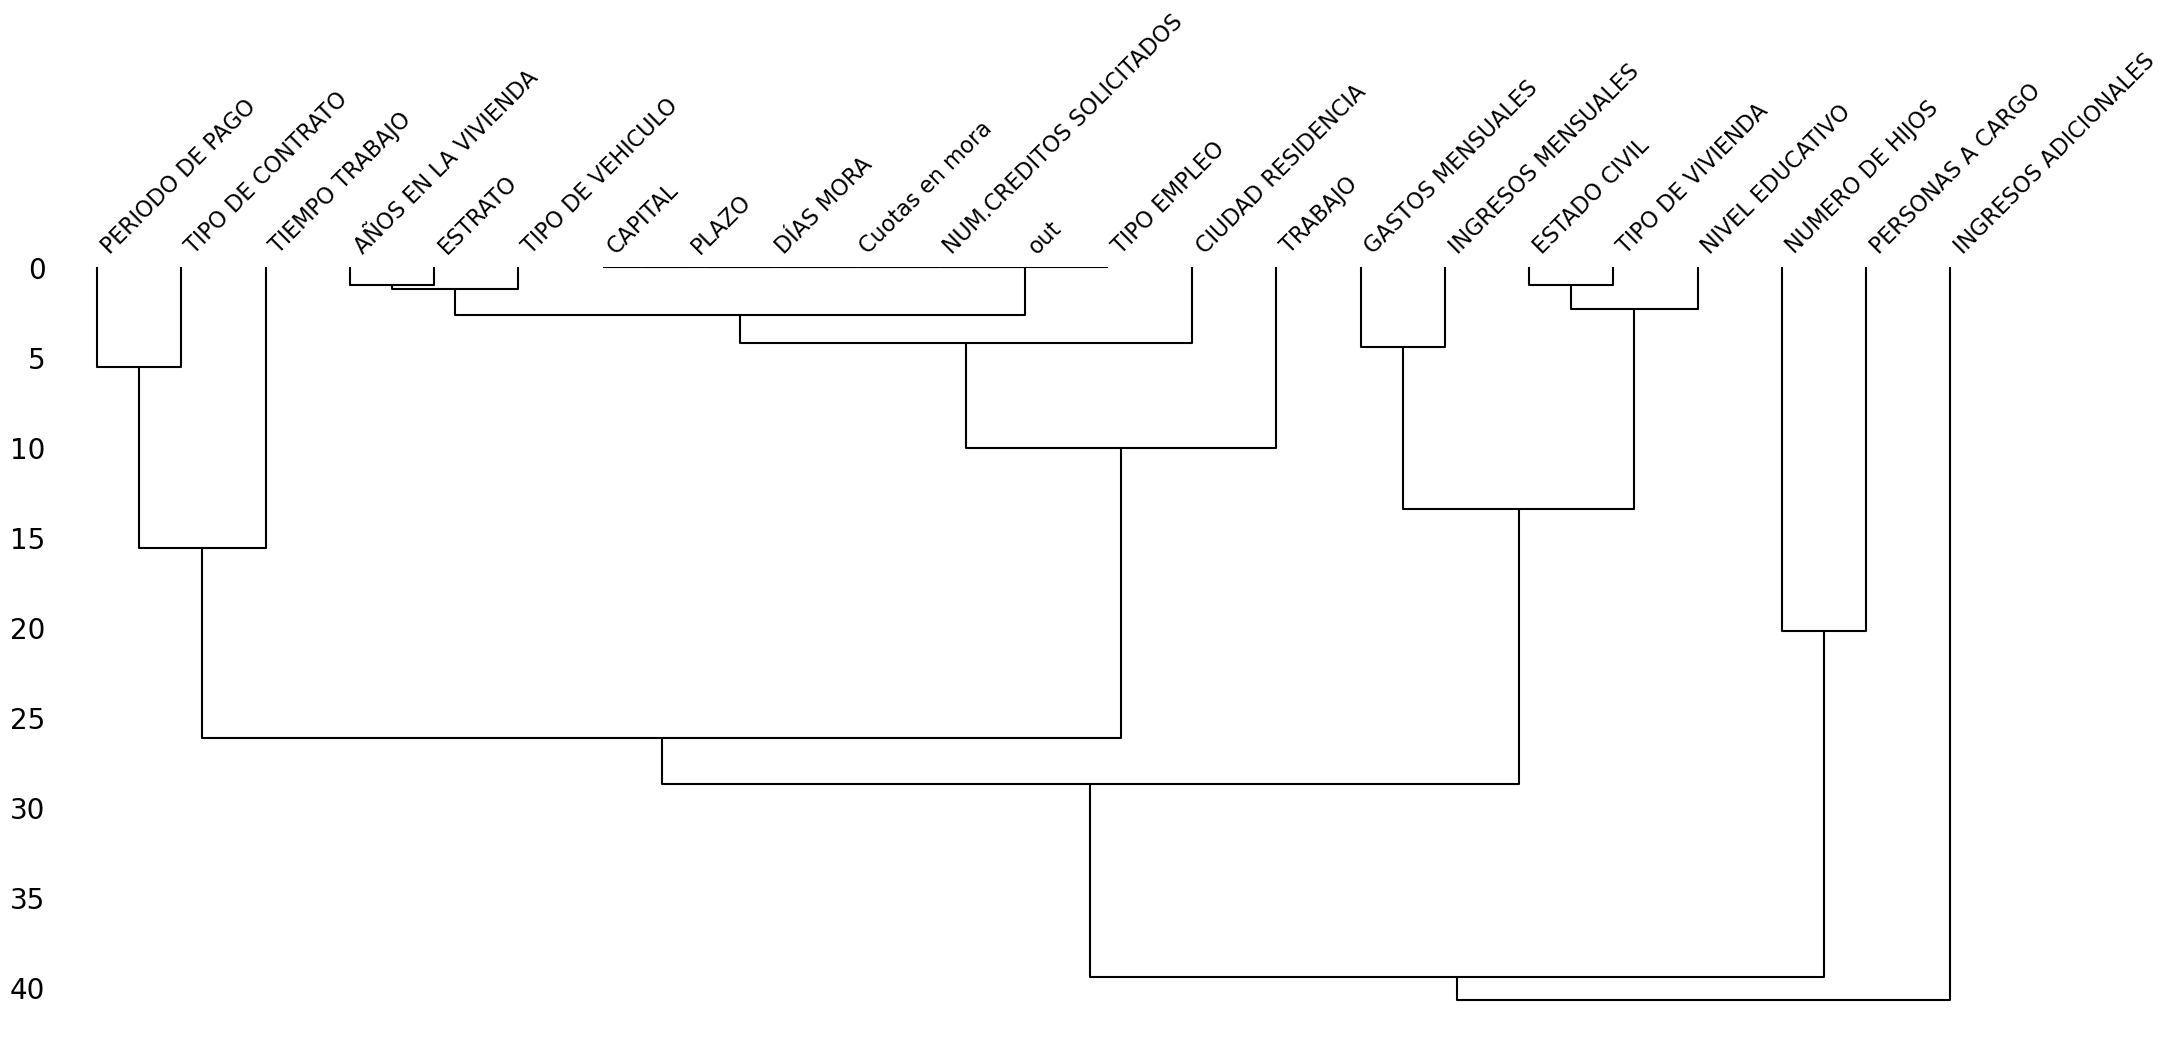

In [ ]:
msno.dendrogram(df)

In [ ]:
df_cc = df.dropna(how='any')
X = sm.add_constant(df_cc.iloc[:,:-1])
y = df_cc['Cuotas en mora']
lm = sm.OLS(y,X).fit()

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).